
# Project: Investigating the "No Show Appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
>The analysis will focus on specific characteristics and how do they relate with the tendency of a patient to attend their medical appointment or not. Also, an analysis will be performed to show how diffirent charactersics relate with each others.

<blockquote>
  <h3>Questions to be discussed in the report.</h3>
<ol>
    <li> Do General Health Conditions Affect the Appointment Attendence Rate? </li>
    <li> Is The Age and General Health of a Patient Related to each other? </li>
</ol>
</blockquote>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('no show appointments dataset.csv')

<a id='wrangling'></a>
## Data Wrangling



> ### General Properties

In [3]:
# Exploring the first few entries from the dataset

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Checking for missing data and different datatypes for each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Checking for duplicated entries

df.duplicated().sum()

0

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<b>
    Minimum value for Age is a negative number!
</b>

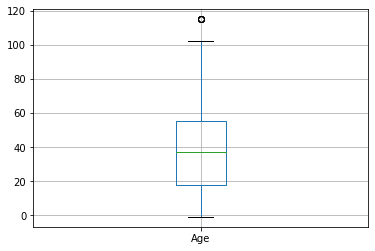

In [7]:
# Checking for values distribution and outliers

df['Age'].plot.box(grid=True);

<b>
    The box plot of the age shows the outliers are above age of 100 years
</b>

> ### Data Cleaning
>> The minimum value for age is a negative number which certainly needs to be accounted for, also getting rid of age outliers.<br>
and the data type of "ScheduledDay" and "AppointmentDay" needs to be changed from string to a proper data type

In [8]:
# Changing the datatypes for dates to work with them easily.

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
# Deleting outliers

df = df[df['Age'] <= 100]

In [10]:
# Counting how many negative entries for age.

df['Age'][df['Age'] < 0].count()

1

<b>Only one entry has a negative value for age

In [11]:
# Since the same patient may schedule for different appointments,
#   I will check if the same patient will appear in a different entry where their age is corectly entered

ID = df[df['Age'] == -1]['PatientId'].iloc[0]
print(ID)

465943158731293.0


In [12]:
df[df['PatientId'] == ID]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


<b>It appears that this is the only entry for this patient, so I will simply drop this entry

In [13]:
df.drop(99832, inplace=True);

<a id='eda'></a>
## Exploratory Data Analysis


> ### Exploring Age Distribution

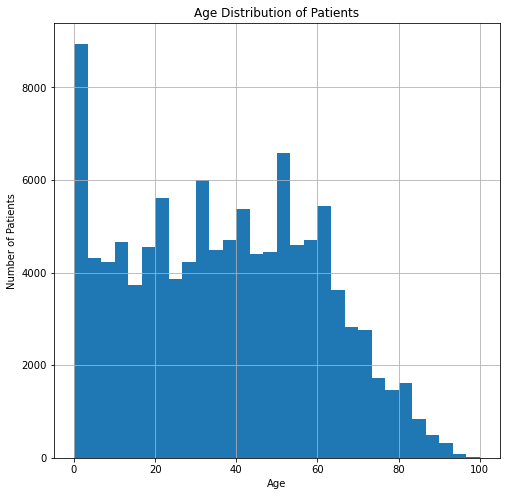

In [14]:
plt.figure(figsize=(8, 8))
plt.hist(df['Age'], 30)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients')
plt.grid(True)
plt.show()

<b> As the above histogram show, a large portion of the medical appointments were for childs below age of 10</b>
___
<b> My study will only target the adults in the given dataset</b>

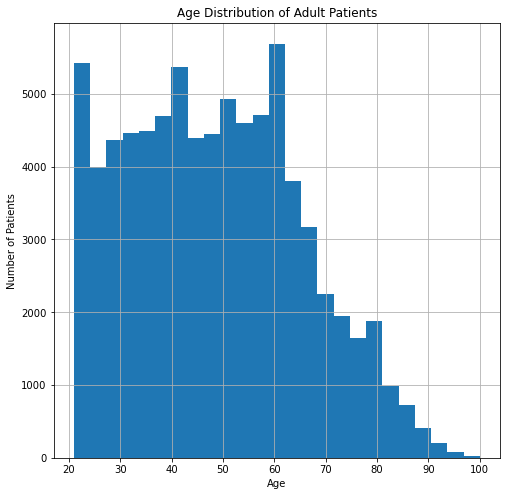

In [15]:
adults_df = df[df['Age'] >= 21].copy()

plt.figure(figsize=(8, 8))
plt.hist(adults_df['Age'], 25)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Adult Patients')
plt.grid(True)
plt.show()

<b>
    The Graph shows the age distribution for adult patients
</b>

In [16]:
# Age percentage according to adults and non adults 
adults = round(adults_df.shape[0] / df.shape[0] * 100, 2)
juniors = round(100 - adults, 2)
print(f'Above 21: {adults} %\nBelow 21: {juniors} %')

Above 21: 71.18 %
Below 21: 28.82 %


> ### Do General Health Conditions Affect the Appointment Attendence Rate?
---
<b>I will merge 'Hipertension', 'Diabetes', 'Alcoholism' and 'Handcap' columns to give a somewhat indication to the general health condition of the patient</b>

In [17]:
# Creating a column consists of the sum of the mentiond columns
#  with minimum value = 0, indicating good health conditions
#  and maximum value = 6, indicating bad health conditions.

GH = adults_df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].sum(axis=1)
adults_df['General_Health'] = GH

In [18]:
adults_df['General_Health'].value_counts()

0    52701
1    17634
2     7655
3      620
4       60
5        1
Name: General_Health, dtype: int64

<b>
    I will split patients who showed up and patients who didn't according to their general health condition.
    </b>
    <br><br>
    <b>
    It's noticed that only one entry with value 5 for general health conditions so I need to determine whether that patient showed up for the appointment or not
</b>

In [19]:
adults_df['General_Health'][adults_df['No-show'] == 'Yes'].value_counts()

0    10638
1     3109
2     1357
3      104
4       11
5        1
Name: General_Health, dtype: int64

<B>
    It's clear that the patient with value 5 for genral health didn't show up for their appointment.
    <br>
    Now I need to append a 0 to the list of patients who showed up to account for the absence of patients with value 5 general health.
</B>

In [20]:
showed = np.array(adults_df['General_Health'][adults_df['No-show'] == 'No'].value_counts())
# Appending a 0 at the end of the list to account for patients who showed up with general health condition 5
showed = np.append(showed, 0)
# I will use the percentage of patients to do the study as the two groups are unequal in entries
showed = showed/showed.sum()*100

nshowed = np.array(adults_df['General_Health'][adults_df['No-show'] == 'Yes'].value_counts())
nshowed = nshowed/nshowed.sum()*100


att = np.append(showed, nshowed)
att = att.reshape((2, 6)).transpose()

attendence = pd.DataFrame(att, columns=["Showed", "Didn't Show"])

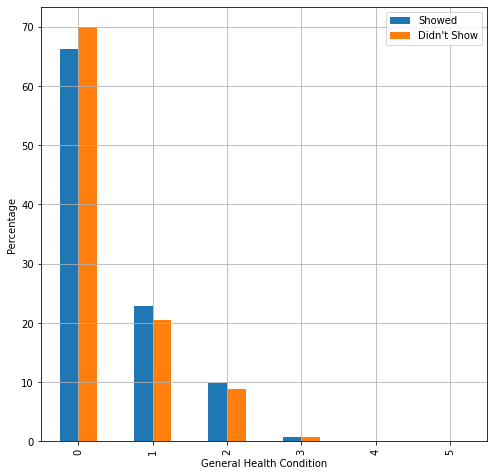

In [21]:
attendence.plot.bar(grid=True, figsize=(8, 8), xlabel='General Health Condition', ylabel='Percentage');

<b>
    
</b>

<b>
    The bar chart shows the percentage of patients who showed up vs patients who didn't show up for different health conditions
</b>

> ### Is The Age and General Health of a Patient Related to each other?

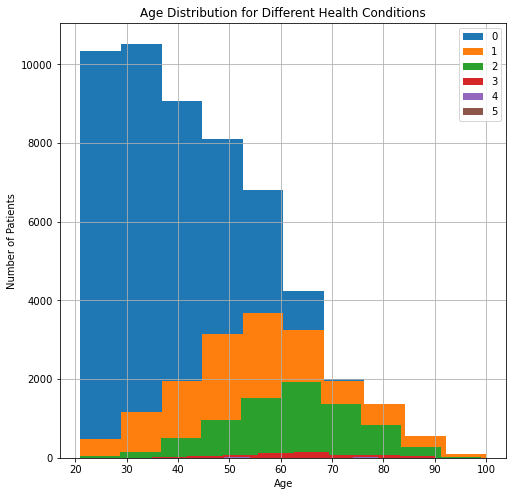

In [22]:
_0 = adults_df['Age'][adults_df['General_Health'] == 0]
_1 = adults_df['Age'][adults_df['General_Health'] == 1]
_2 = adults_df['Age'][adults_df['General_Health'] == 2]
_3 = adults_df['Age'][adults_df['General_Health'] == 3]
_4 = adults_df['Age'][adults_df['General_Health'] == 4]
_5 = adults_df['Age'][adults_df['General_Health'] == 5]

plt.figure(figsize=(8, 8))
plt.hist(_0, label='0')
plt.hist(_1, label='1')
plt.hist(_2, label='2')
plt.hist(_3, label='3')
plt.hist(_4, label='4')
plt.hist(_5, label='5')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution for Different Health Conditions')
plt.grid(True)
plt.show()


<a id='conclusions'></a>
# Conclusions
> ## Results:
> ### 1. Exploring Age Distribution:
>> A large portion of more than one-fourth the total patients are below 21 years indicating parents giving good attention for thier childrens health.
<br>
But since the performed study targeting the adults set of the patients, I excluded the juniors from the dataset.


> ### 2. Do General Health Conditions Affect the Appointment Attendence Rate?
>> From the bar chart for the patients who showed up and those who didn't. It's shown that for each value of General Health we got a nearly equal percentage of patients showing up and patients not showing up for thier appointments.
<br>
Although the number of patients with good health conditions tend to schedule more medical appointment than those with bad health conditions.
<br><br>
Therefore the General Health Condition for the patients doesn't affect their tendency to attend thier medical appointment.


> ### 3. Is The Age and General Health of a Patient Related to each other?
>> From the stacked histogram showing the age distribution for each value for health conditions, it's observed that:
<br>
As the general health condition worsens the average age of patients shifts to the right, indicating that for bad health conditions it's more expected that the patient will be of older age.
<br>
Or, in other words, as the patient gets older it's more probable for them to suffer bad health conditions.

> ## Limitation:
> 1. Most of our variables are categorical, which does not allow for a high level of statistical method that can be used to provide correlations. And so we cannot show strong correlations between different factors.
> 2. The statistics used here are describtive statistics, not inferential, meaning that we did not create any hypotheses or controlled experiments.